In [1]:
# Importing necessary libraries
import pandas as pd  # data manipulation and analysis
import matplotlib.pyplot as plt  # plotting and visualization
import re  # regular expressions
import string  # string manipulation
from nltk import download  # for downloading nltk data
from nltk.corpus import stopwords  # for stopwords
from nltk.stem import WordNetLemmatizer  # for word lemmatization
import seaborn as sns  # statistical data visualization
import contractions
from nltk.tokenize import word_tokenize

# Downloading required nltk data
download('stopwords')
download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rmora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rmora\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Loading the dataset
df = pd.read_csv("../Data/ProjectTweets.csv", header=None)

# Display the first 5 rows of the dataset for a quick initial exploration
display(df.head())

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# Display information about the dataset (data types, number of non-null values, etc.)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


None

### Note: 
It seems like there are no missing values in the dataset.  
I will add headers to the columns for a better understanding of the data.

### Dataset Columns:
- `IDs`: The id of the tweet (e.g., 4587)
- `Date`: The date of the tweet (e.g., Sat May 16 23:58:44 UTC 2009)
- `Flag`: The query (e.g., lyx). If there is no query, then this value is NO_QUERY.
- `user`: The user that tweeted (e.g., bobthebuilder)
- `text`: The text of the tweet (e.g., Lyx is cool)

In [4]:
# Define column names for the dataset
column_names = ["Index", "IDs", "Date", "Flag", "user", "text"]

# Reload the dataset with column names
df = pd.read_csv("../Data/ProjectTweets.csv", header=None, names=column_names)

# Display the first 5 rows of the dataset with column names
display(df.head())

,Index,IDs,Date,Flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Checking the number of unique values in 'Index' and 'IDs' columns
unique_index = df["Index"].nunique()
unique_ids = df["IDs"].nunique()

# Displaying the number of unique values
print(f"Number of unique values in 'Index': {unique_index}")
print(f"Number of unique values in 'IDs': {unique_ids}")

"Number of unique values in 'Index': 1600000"

"Number of unique values in 'IDs': 1598315"

### Notes on Unique Values:
- The first column, 'Index', seems to be just an index and therefore is not needed.
- The second column, 'IDs', appears to have a few duplicates. As I assumed that 'IDs' should be unique, I will check for and remove any duplicate rows.

In [6]:
# Dropping the 'Index' column
df = df.drop(columns="Index")

In [7]:
# Checking for duplicates in the dataset
duplicates = df.duplicated().sum()

# Displaying the number of duplicate rows
display(f"Number of duplicate rows: {duplicates}")

'Number of duplicate rows: 1685'

### Notes on Duplicates:
- As assumed, 'IDs' is a unique value for each tweet. Therefore, I can drop the 'IDs' column and remove any duplicate tweets to ensure data consistency.

In [8]:
# Dropping duplicate rows
df = df.drop_duplicates()

# Dropping the 'IDs' column
df = df.drop(columns="IDs")

# Displaying the dataset information after dropping duplicates
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598315 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Date    1598315 non-null  object
 1   Flag    1598315 non-null  object
 2   user    1598315 non-null  object
 3   text    1598315 non-null  object
dtypes: object(4)
memory usage: 61.0+ MB


None

In [9]:
# Checking unique values in 'Flag' column
unique_flags = df["Flag"].unique()

# Displaying unique values in 'Flag'
display(f"Unique values in 'Flag': {unique_flags}")

"Unique values in 'Flag': ['NO_QUERY']"

### Notes on 'Flag' Column:
- The 'Flag' column will be dropped as it contains only one unique value, which is not relevant for this analysis.

In [10]:
# Dropping the 'Flag' column
df = df.drop(columns="Flag")

Now before drop any other column will be useful to identify the time frame of the dataset

### Notes on Date Transformation:
- The 'Date' column is transformed to a more appropriate format for this analysis. The analysis will be performed by week, month, and trimester, which requires the date to be in the correct format.

In [11]:
# Converting 'Date' column to datetime format and extracting the date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%a %b %d %H:%M:%S PDT %Y').dt.strftime('%Y-%m-%d')

# Displaying the first few rows of the dataframe after the date transformation
display(df.head())

,Date,user,text
0,2009-04-06,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,2009-04-06,scotthamilton,is upset that he can't update his Facebook by ...
2,2009-04-06,mattycus,@Kenichan I dived many times for the ball. Man...
3,2009-04-06,ElleCTF,my whole body feels itchy and like its on fire
4,2009-04-06,Karoli,"@nationwideclass no, it's not behaving at all...."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598315 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Date    1598315 non-null  object
 1   user    1598315 non-null  object
 2   text    1598315 non-null  object
dtypes: object(3)
memory usage: 48.8+ MB


In [13]:
df['Date'].min()

'2009-04-06'

In [14]:
df['Date'].max()

'2009-06-25'

### Notes on 'User' Column:
- Although the 'user' column will be deleted to focus solely on the content of the tweets, I will first analyze the distribution of tweets among users. 
- This will help to identify any potential biases in the dataset before proceeding with further analysis.

In [15]:
# Checking the distribution of tweets among users
user_distribution = df["user"].value_counts()

# Displaying the distribution of tweets among users
display(user_distribution)

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
sleeping_gypsy       1
alannamalyn          1
robertreset          1
juicybabyyy          1
bpbabe               1
Name: user, Length: 659775, dtype: int64

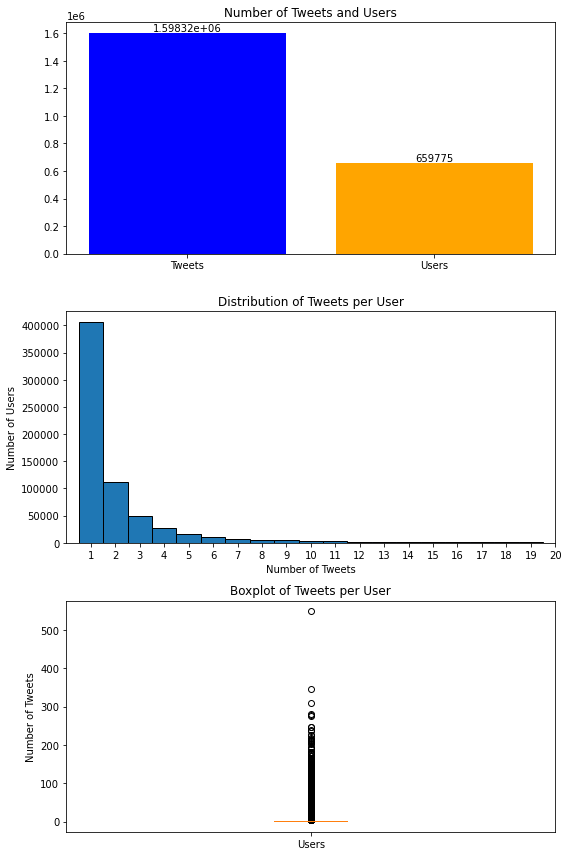

In [16]:
# Count the number of tweets
num_tweets = len(df)

# Count the number of unique users
num_users = df["user"].nunique()

# Count tweets per user
tweets_per_user = df['user'].value_counts()

# Set up a 3x1 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Plot bar chart in the first subplot
bars = axs[0].bar(["Tweets", "Users"], [num_tweets, num_users], color=['blue', 'orange'])
axs[0].bar_label(bars)
axs[0].set_title('Number of Tweets and Users')

# Plot histogram in the second subplot
axs[1].hist(tweets_per_user, bins=range(1, 21), edgecolor='black', align='left')
axs[1].set_title('Distribution of Tweets per User')
axs[1].set_xlabel('Number of Tweets')
axs[1].set_ylabel('Number of Users')
axs[1].set_xticks(range(1, 21))
axs[1].set_xlim(0, 20)

# Plot boxplot in the third subplot
axs[2].boxplot(tweets_per_user)
axs[2].set_title('Boxplot of Tweets per User')
axs[2].set_ylabel('Number of Tweets')
axs[2].set_xticklabels(['Users'])

# Adjust the spacing between plots
plt.tight_layout()

# Display the charts
plt.show()

### Insights from the Graphs:

1. **Tweet-to-User Ratio:**
   - There are approximately 1.598 million tweets in the dataset from about 659,775 unique users.
   - On average, each user has contributed slightly more than 2 tweets. This suggests a mix of users - some tweeted once, while others tweeted multiple times.

2. **Skewness:**
   - The distribution of tweets per user is heavily right-skewed, meaning most users have tweeted a few times, but a few have tweeted many more times than the average.

3. **Boxplot Insights:**
   - The boxplot shows the median and interquartile range is clustered at low tweet counts, while the long whisker and points above demonstrate the outliers in the dataset.

4. **Outliers:**
   - The top 5 users with the most tweets are clear outliers in the distribution. For instance, the user "lost_dog" has tweeted 549 times, which is significantly higher than the typical user in the dataset.

5. **Potential Bias:**
   - While there is some repetition in users, the diverse range of users minimizes bias from repeated users.

6. **Generalization:**
   - The dataset is likely a good representation for sentiment analysis, not heavily influenced by a small group of vocal users.

7. **Impact on Analysis:**
   - The dataset's size means outliers have minimal impact on aggregate metrics, with the median and other percentiles remaining largely unaffected.

In conclusion, this dataset, with its diversity in user representation, is beneficial for sentiment analysis. The potential bias from users tweeting multiple times is present, but it is not significant enough to skew the overall results dramatically.

In [17]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Text Preprocessing

In [19]:
hashtag_pattern = r'#(\w+)'
# Extract hashtags and add to new column
df['Hashtags'] = df['text'].apply(lambda x: re.findall(hashtag_pattern, x))
df.head()

,Date,user,text,Hashtags
0,2009-04-06,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[]
1,2009-04-06,scotthamilton,is upset that he can't update his Facebook by ...,[]
2,2009-04-06,mattycus,@Kenichan I dived many times for the ball. Man...,[]
3,2009-04-06,ElleCTF,my whole body feels itchy and like its on fire,[]
4,2009-04-06,Karoli,"@nationwideclass no, it's not behaving at all....",[]


In [20]:
mention_pattern = r'@(\w+)'
# Extract mentions and add to new column
df['Mentions'] = df['text'].apply(lambda x: re.findall(mention_pattern, x))
df.head()

,Date,user,text,Hashtags,Mentions
0,2009-04-06,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[],[switchfoot]
1,2009-04-06,scotthamilton,is upset that he can't update his Facebook by ...,[],[]
2,2009-04-06,mattycus,@Kenichan I dived many times for the ball. Man...,[],[Kenichan]
3,2009-04-06,ElleCTF,my whole body feels itchy and like its on fire,[],[]
4,2009-04-06,Karoli,"@nationwideclass no, it's not behaving at all....",[],[nationwideclass]


In [27]:
# Initialize the WordNet lemmatizer and set of English stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [28]:
def preprocess_text(text):
   
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove user mentions and hashtags
    text = re.sub(r'\@\w+|\#','', text)
    
    # Remove punctuation
    no_punctuation = [char for char in text if char not in string.punctuation]
    text = ''.join(no_punctuation)
    
    # Remove stopwords and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word.lower() not in stop_words and len(word) > 2])
    
    return text

In [29]:
# Apply the 'preprocess_text' function to the 'text' column and store the result in a new column
df['pp_text'] = df['text'].apply(preprocess_text)

In [30]:
# Grouping tweets by date and counting the number of tweets on each date
tweets_over_time = df.groupby('Date').size().reset_index()
tweets_over_time.columns = ['Date', 'Tweet_Count']

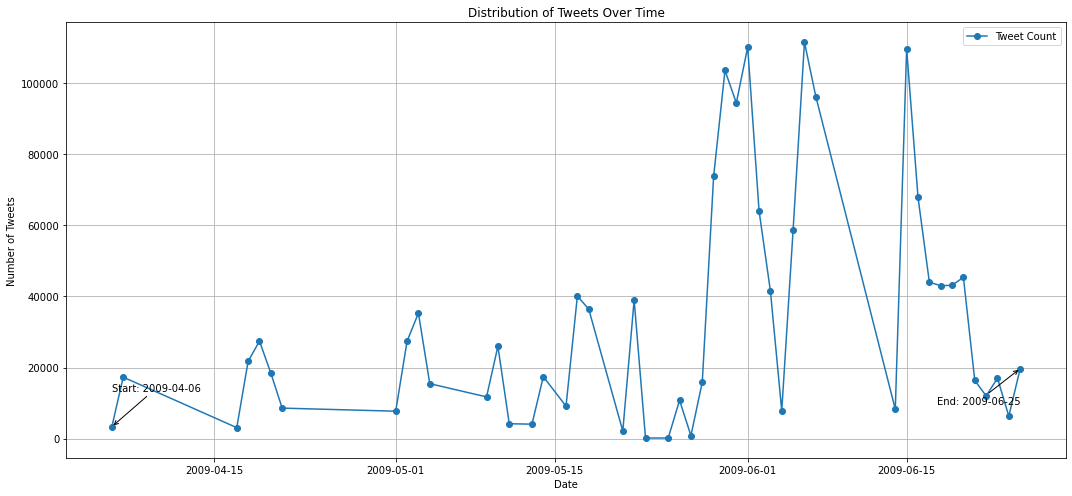

In [31]:
# Plotting the distribution of tweets over time
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(tweets_over_time['Date'], tweets_over_time['Tweet_Count'], marker='o', linestyle='-', label='Tweet Count')
ax.set_title('Distribution of Tweets Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')

# Highlighting the start and end dates of the dataset
start_date = tweets_over_time['Date'].iloc[0]
end_date = tweets_over_time['Date'].iloc[-1]

ax.annotate(f'Start: {start_date.strftime("%Y-%m-%d")}', 
             xy=(start_date, tweets_over_time['Tweet_Count'].iloc[0]), 
             xytext=(start_date, tweets_over_time['Tweet_Count'].iloc[0] + 10000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='left')

ax.annotate(f'End: {end_date.strftime("%Y-%m-%d")}', 
             xy=(end_date, tweets_over_time['Tweet_Count'].iloc[-1]), 
             xytext=(end_date, tweets_over_time['Tweet_Count'].iloc[-1] - 10000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='right')

# Adjusting grid, legend, and layout
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

We can notice that there are day without data

## Based on the updated graph "Distribution of Tweets Over Time," I have derived several observations:

- **Time Span:** The data spans from April 6, 2009, to June 25, 2009, covering almost three months.

- **Variability:** The number of tweets fluctuates significantly throughout the period, indicating an inconsistency in tweet volume over time.

- **Initial Low Volume:** At the beginning of the period, around April 6, 2009, there's a noticeable low volume of tweets.

- **Significant Peaks:**
    - A prominent peak occurs around mid-May, showcasing a substantial increase in tweet volume.
    - The highest peak is observed in early June, with the tweet count nearing 100,000.

- **Declining Trend Towards the End:** Post the peak in June, there's a sharp decrease in the number of tweets. By the end of the dataset's time range on June 25, 2009, the volume has significantly diminished.

- **Final Rise:** Just before the dataset concludes, there's a minor surge in the number of tweets, possibly indicating a renewed interest or activity in the topic.

# Identifying Trends Post-Text Preprocessing

After preprocessing the text data, I want to inspect the dataset for duplicates to identify if the observed peaks in tweet distribution are related to trends.

In [34]:
df.head()

,Date,user,text,Hashtags,Mentions,pp_text
0,2009-04-06,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[],[switchfoot],thats bummer shoulda got david carr third day
1,2009-04-06,scotthamilton,is upset that he can't update his Facebook by ...,[],[],upset cant update facebook texting might cry r...
2,2009-04-06,mattycus,@Kenichan I dived many times for the ball. Man...,[],[Kenichan],dived many time ball managed save rest bound
3,2009-04-06,ElleCTF,my whole body feels itchy and like its on fire,[],[],whole body feel itchy like fire
4,2009-04-06,Karoli,"@nationwideclass no, it's not behaving at all....",[],[nationwideclass],behaving mad cant see


In [37]:
import numpy as np
# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Date           0
user           0
text           0
Hashtags       0
Mentions       0
pp_text     8707
dtype: int64


In [39]:
# Drop rows with NaN values in pp_text column
df.dropna(subset=['pp_text'], inplace=True)

In [40]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Date        0
user        0
text        0
Hashtags    0
Mentions    0
pp_text     0
dtype: int64


In [38]:
# Find the distribution of tweets after text preprocessing
tweet_distribution = df["pp_text"].value_counts()
tweet_distribution.head(10)

thanks                                                   2775
thank                                                    1823
get 100 follower day using add everyone train pay vip    1484
good morning                                             1177
miss                                                     1000
work                                                      894
love                                                      740
know                                                      660
yes                                                       621
headache                                                  565
Name: pp_text, dtype: int64

## Analysis of Top Duplicates
After inspecting the dataset for duplicates post-text preprocessing, I observed that:

- **Nature of duplicates:** There are some common phrases, while others are exact duplicates of tweets. The latter may indicate spam or automated tweets.

- **Sentiment ambiguity:** Common phrases like "miss," "work," and "know" are sentiment-ambiguous. Without additional context, it's challenging to ascertain their sentiment, making them less informative for sentiment analysis.

- **Impact on results:** The dataset is large, so removing a few thousand duplicates may not significantly impact the overall results.

In [41]:
# Filter DataFrame by specific tweet
filtered_df = df.loc[df['pp_text'] == 'get 100 follower day using add everyone train pay vip']

In [43]:
# Get unique usernames for filtered DataFrame
unique_usernames = filtered_df['user'].unique()
unique_usernames

array(['tweeteradder1', 'tweeteradder2', 'tweeteradder3', 'tweeteradder6',
       'tweeteradder7', 'tweeteradder8', 'tweeteradder9', 'tweeteradder4',
       'tweeteradder5', 'tweeteradder10', 'tweeteradder11',
       'tweeteradder12', 'tweeteradder13', 'tweeteradder14',
       'tweeteradder15', 'tweeteradder16', 'tweeteradder17',
       'tweeteradder18', 'tweeteradder20', 'tweeteradder31',
       'tweetfollow3', 'tweetfollow4', 'tweetfollow6', 'tweetfollow7'],
      dtype=object)

In [45]:
# Filter DataFrame by spam usernames
spam_df = df[df['user'].isin(unique_usernames)]
spam_df

,Date,user,text,Hashtags,Mentions,pp_text
1374654,2009-06-05,tweeteradder1,@feiyie Get 100 followers a day using www.twee...,[],[feiyie],get 100 follower day using add everyone train ...
1374667,2009-06-05,tweeteradder1,@karl09 Get 100 followers a day using www.twee...,[],[karl09],get 100 follower day using add everyone train ...
1374673,2009-06-05,tweeteradder1,@bflint Get 100 followers a day using www.twee...,[],[bflint],get 100 follower day using add everyone train ...
1374680,2009-06-05,tweeteradder1,@natallon Get 100 followers a day using www.tw...,[],[natallon],get 100 follower day using add everyone train ...
1374691,2009-06-05,tweeteradder1,@blakmanpromo Get 100 followers a day using ww...,[],[blakmanpromo],get 100 follower day using add everyone train ...
...,...,...,...,...,...,...
1569619,2009-06-15,tweetfollow7,@helldognj Get 100 followers a day using www.t...,[],[helldognj],get 100 follower day using add everyone train ...
1569629,2009-06-15,tweetfollow7,@ceciandlace82 Get 100 followers a day using w...,[],[ceciandlace82],get 100 follower day using add everyone train ...
1569637,2009-06-15,tweetfollow7,@richj4you Get 100 followers a day using www.t...,[],[richj4you],get 100 follower day using add everyone train ...
1569645,2009-06-15,tweetfollow7,@offcialxmshae Get 100 followers a day using w...,[],[offcialxmshae],get 100 follower day using add everyone train ...


I will proceed to remove spam tweets to reduce potential biases, although this may not significantly affect the results.

In [47]:
# Drop rows containing spam phrases
df = df[df['pp_text'] != "get 100 follower day using add everyone train pay vip"]

# Reset the index post-dropping rows
df.reset_index(drop=True, inplace=True)

In [48]:
# Explode Hashtags column and get top 10 hashtags
top_hashtags = df['Hashtags'].explode().value_counts().head(10)
print('Top 10 Hashtags:')
print(top_hashtags)

# Explode Mentions column and get top 10 mentions
top_mentions = df['Mentions'].explode().value_counts().head(10)
print('Top 10 Mentions:')
print(top_mentions)

Top 10 Hashtags:
followfriday    2112
fb              1743
squarespace      887
FF               572
1                519
seb              499
FollowFriday     463
musicmonday      404
ff               395
iranelection     359
Name: Hashtags, dtype: int64
Top 10 Mentions:
mileycyrus         4458
tommcfly           3854
ddlovato           3457
DavidArchie        1295
Jonasbrothers      1280
jordanknight       1126
DonnieWahlberg     1103
mitchelmusso       1066
JonathanRKnight    1060
taylorswift13      1008
Name: Mentions, dtype: int64


In [53]:
# List of hashtags to filter by
hashtags = ['followfriday', 'FollowFriday', 'ff', 'FF']

# Explode Hashtags column
exploded_df = df.explode('Hashtags')

# Filter DataFrame by rows that contain any of the hashtags
filtered_df = exploded_df[exploded_df['Hashtags'].isin(hashtags)]
filtered_df

,Date,user,text,Hashtags,Mentions,pp_text
10054,2009-04-18,jessc098,So many new followers from #followfriday! Welc...,followfriday,[],many new follower followfriday welcome everyon...
43136,2009-05-01,eadnams,@dirklancer I dont normally partake in #follow...,followfriday,[dirklancer],dont normally partake followfriday follower
45636,2009-05-02,NixyValentine,Thank you @dpbkmb and @inkgypsy for the #follo...,followfriday,"[dpbkmb, inkgypsy]",thank followfriday wasnt day didnt get make list
47553,2009-05-02,kovshenin,@webdesign_news @MATT_369 @baires @doktorbuzzo...,followfriday,"[webdesign_news, MATT_369, baires, doktorbuzzo...",thx followfriday bad missed
52830,2009-05-02,TimmyPlanetM,@Barron00 @grouchypuppy @hanseebundee Thank yo...,followfriday,"[Barron00, grouchypuppy, hanseebundee]",thank followfriday good friend mom didnt let c...
...,...,...,...,...,...,...
1553630,2009-06-15,PaulTTran,"@katiebcosmetics Hehe, don't worry about it. I...",followfriday,[katiebcosmetics],hehe dont worry still owe followfriday amp des...
1559998,2009-06-15,laramarco,@NaturesDecor you are welcome #FF,FF,[NaturesDecor],welcome
1579786,2009-06-16,PRNicoleV,@mikeschaffer @PressControls @GeoffHampton @Te...,followfriday,"[mikeschaffer, PressControls, GeoffHampton, Te...",thanks followfridays last week
1581778,2009-06-16,WRPaintball,@pbgossip thanks for the #followfriday ...bee...,followfriday,[pbgossip],thanks followfriday bit busy past day


## Sentiment Analysis
Sentiment analysis will help to comprehend the general emotional tone expressed in the tweets.

In [54]:
# Perform sentiment analysis
from textblob import TextBlob

# Define function to calculate sentiment score
def get_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Define function to categorize sentiment based on score
def get_sentiment_category(score):
    if score > 0:
        return 'positive'
    elif score == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply functions to create new columns
df['sentiment_score'] = df['pp_text'].apply(get_sentiment_score)
df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)

df.head()

C:\Users\rmora\AppData\Local\Temp\ipykernel_7068\4093719164.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df['pp_text'].apply(get_sentiment_score)
C:\Users\rmora\AppData\Local\Temp\ipykernel_7068\4093719164.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)


,Date,user,text,Hashtags,Mentions,pp_text,sentiment_score,sentiment_category
0,2009-04-06,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[],[switchfoot],thats bummer shoulda got david carr third day,0.000,neutral
1,2009-04-06,scotthamilton,is upset that he can't update his Facebook by ...,[],[],upset cant update facebook texting might cry r...,0.000,neutral
2,2009-04-06,mattycus,@Kenichan I dived many times for the ball. Man...,[],[Kenichan],dived many time ball managed save rest bound,0.500,positive
3,2009-04-06,ElleCTF,my whole body feels itchy and like its on fire,[],[],whole body feel itchy like fire,0.200,positive
4,2009-04-06,Karoli,"@nationwideclass no, it's not behaving at all....",[],[nationwideclass],behaving mad cant see,-0.625,negative


In [55]:
# Explode Hashtags column
exploded_df = df.explode('Hashtags')

# Filter DataFrame by rows that contain any of the hashtags
filtered_df = exploded_df[exploded_df['Hashtags'].isin(hashtags)]
filtered_df

,Date,user,text,Hashtags,Mentions,pp_text,sentiment_score,sentiment_category
10054,2009-04-18,jessc098,So many new followers from #followfriday! Welc...,followfriday,[],many new follower followfriday welcome everyon...,0.296591,positive
43136,2009-05-01,eadnams,@dirklancer I dont normally partake in #follow...,followfriday,[dirklancer],dont normally partake followfriday follower,0.150000,positive
45636,2009-05-02,NixyValentine,Thank you @dpbkmb and @inkgypsy for the #follo...,followfriday,"[dpbkmb, inkgypsy]",thank followfriday wasnt day didnt get make list,0.000000,neutral
47553,2009-05-02,kovshenin,@webdesign_news @MATT_369 @baires @doktorbuzzo...,followfriday,"[webdesign_news, MATT_369, baires, doktorbuzzo...",thx followfriday bad missed,-0.700000,negative
52830,2009-05-02,TimmyPlanetM,@Barron00 @grouchypuppy @hanseebundee Thank yo...,followfriday,"[Barron00, grouchypuppy, hanseebundee]",thank followfriday good friend mom didnt let c...,0.700000,positive
...,...,...,...,...,...,...,...,...
1553630,2009-06-15,PaulTTran,"@katiebcosmetics Hehe, don't worry about it. I...",followfriday,[katiebcosmetics],hehe dont worry still owe followfriday amp des...,0.333333,positive
1559998,2009-06-15,laramarco,@NaturesDecor you are welcome #FF,FF,[NaturesDecor],welcome,0.800000,positive
1579786,2009-06-16,PRNicoleV,@mikeschaffer @PressControls @GeoffHampton @Te...,followfriday,"[mikeschaffer, PressControls, GeoffHampton, Te...",thanks followfridays last week,0.100000,positive
1581778,2009-06-16,WRPaintball,@pbgossip thanks for the #followfriday ...bee...,followfriday,[pbgossip],thanks followfriday bit busy past day,0.016667,positive


## Sentiment Distribution Analysis
In this section, I will analyze the distribution of sentiments (positive, neutral, negative) across the tweets in the cleaned dataset.

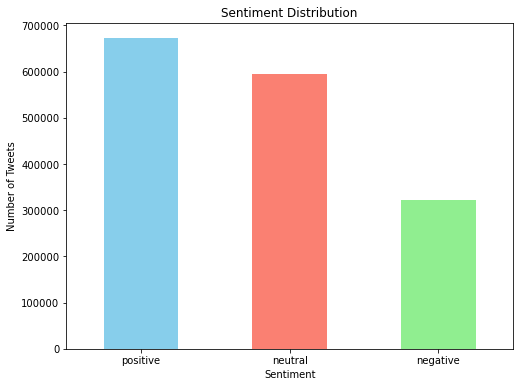

In [56]:
# Calculate the sentiment distribution
sentiment_counts = df['sentiment_category'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

### Observations and Conclusion
From the bar chart above, I can observe the following:

1. **Positive Sentiment:** The majority of tweets in the dataset exhibit a positive sentiment. This indicates that, during the time frame of this dataset, the overall sentiment expressed by users was largely positive.

2. **Neutral Sentiment:** The second most frequent category is neutral. This implies that a significant portion of tweets are informational or indifferent in nature, not expressing a strong positive or negative sentiment.

3. **Negative Sentiment:** Although less frequent compared to positive and neutral sentiments, there is still a considerable number of tweets that are classified as negative.

It is important to note that the prevalence of positive sentiments could potentially introduce a bias towards positive sentiments when I train the machine learning models using this dataset.

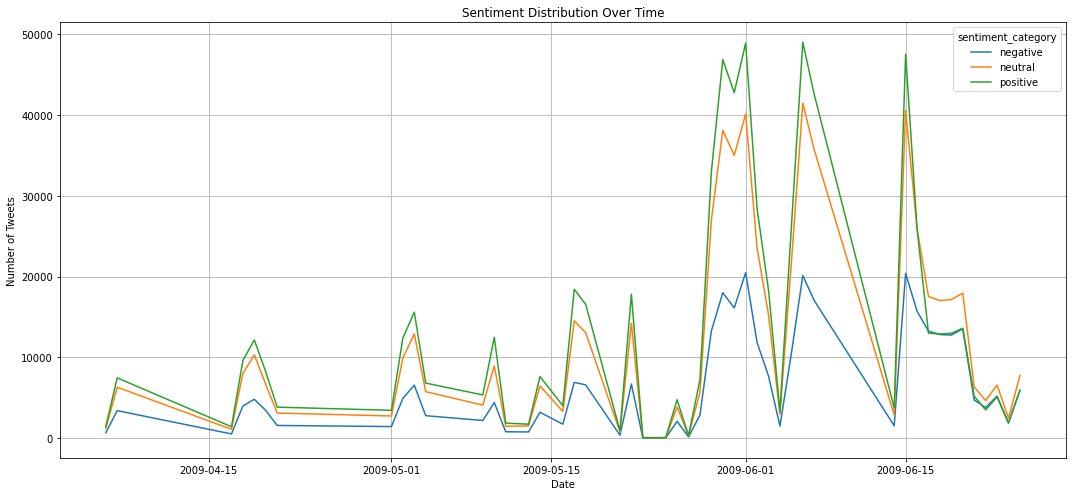

In [57]:
# Group the data by date and sentiment
grouped_df = df.groupby([df['Date'].dt.date, 'sentiment_category']).size().reset_index(name='count')

# Pivot the data for better visualization
pivot_df = grouped_df.pivot(index='Date', columns='sentiment_category', values='count').fillna(0)

# Plot the data
fig, ax = plt.subplots(figsize=(15, 7))
pivot_df.plot(kind='line', ax=ax)
ax.set_title('Sentiment Distribution Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.grid(True, which='both')
plt.tight_layout()
plt.show()

### Observations and Conclusion
Upon analyzing the distribution of sentiments over time, I can draw the following conclusions:

- The sentiments tend to follow the same general trend as the overall distribution of tweets over time, suggesting that the proportion of each sentiment category remains relatively constant.

- There are no noticeable peaks or declines in any particular sentiment category over time, implying that the relative proportion of positive, neutral, and negative tweets remains stable throughout the dataset's timeframe.


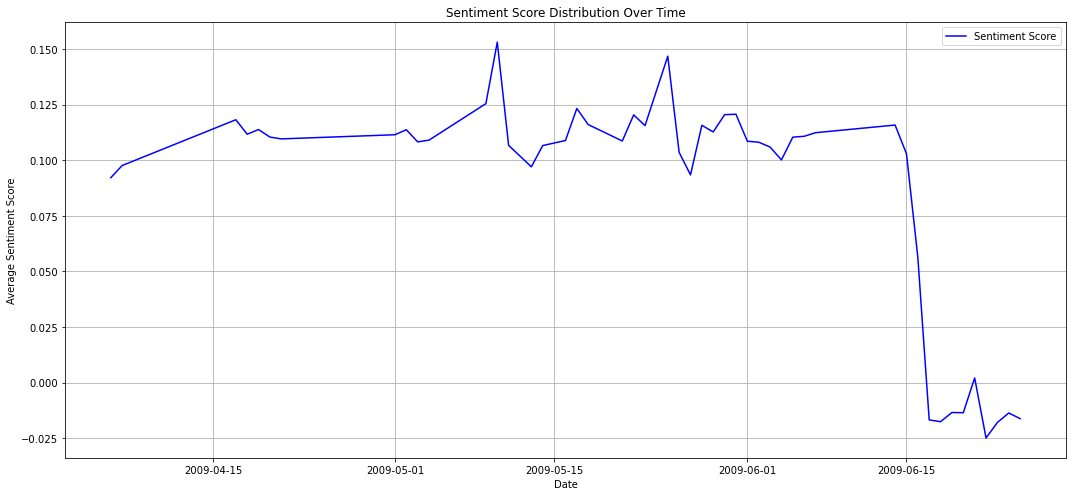

In [58]:
# Group the data by date and calculate the average sentiment score for each date
grouped_df = df.groupby(df['Date'].dt.date)['sentiment_score'].mean().reset_index()

# Plot the data
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(grouped_df['Date'], grouped_df['sentiment_score'], label='Sentiment Score', color='blue')
ax.set_title('Sentiment Score Distribution Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment Score')
ax.grid(True, which='both')
plt.tight_layout()
plt.legend()
plt.show()

In [28]:
df2 = pd.read_csv("cleaned_dataset.csv")

In [32]:
#df2 = df
# Convert 'Date' column to datetime
df2['Date'] = pd.to_datetime(df2['Date'])
# Set Date as the dataframe index
df2.set_index('Date', inplace=True)

In [33]:
df2.head()

,user,text,Hashtags,Mentions,pp_text,sentiment_score,sentiment_category
Date,,,,,,,
2009-04-06,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[],['switchfoot'],thats bummer shoulda got david carr third day,0.000,neutral
2009-04-06,scotthamilton,is upset that he can't update his Facebook by ...,[],[],upset cant update facebook texting might cry r...,0.000,neutral
2009-04-06,mattycus,@Kenichan I dived many times for the ball. Man...,[],['Kenichan'],dived many time ball managed save rest bound,0.500,positive
2009-04-06,ElleCTF,my whole body feels itchy and like its on fire,[],[],whole body feel itchy like fire,0.200,positive
2009-04-06,Karoli,"@nationwideclass no, it's not behaving at all....",[],['nationwideclass'],behaving mad cant see,-0.625,negative


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588124 entries, 0 to 1588123
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Date                1588124 non-null  object 
 1   user                1588124 non-null  object 
 2   text                1588124 non-null  object 
 3   Hashtags            1588124 non-null  object 
 4   Mentions            1588124 non-null  object 
 5   pp_text             1588124 non-null  object 
 6   sentiment_score     1588124 non-null  float64
 7   sentiment_category  1588124 non-null  object 
dtypes: float64(1), object(7)
memory usage: 96.9+ MB


In [34]:
# Aggregate the data by Date
weekly_sentiment = df2.resample('W').agg({
    'sentiment_score': 'mean'
})
weekly_sentiment

,sentiment_score
Date,
2009-04-12,0.096715
2009-04-19,0.113171
2009-04-26,0.110139
2009-05-03,0.110717
2009-05-10,0.134177
2009-05-17,0.115270
2009-05-24,0.118007
2009-05-31,0.117700
2009-06-07,0.109591


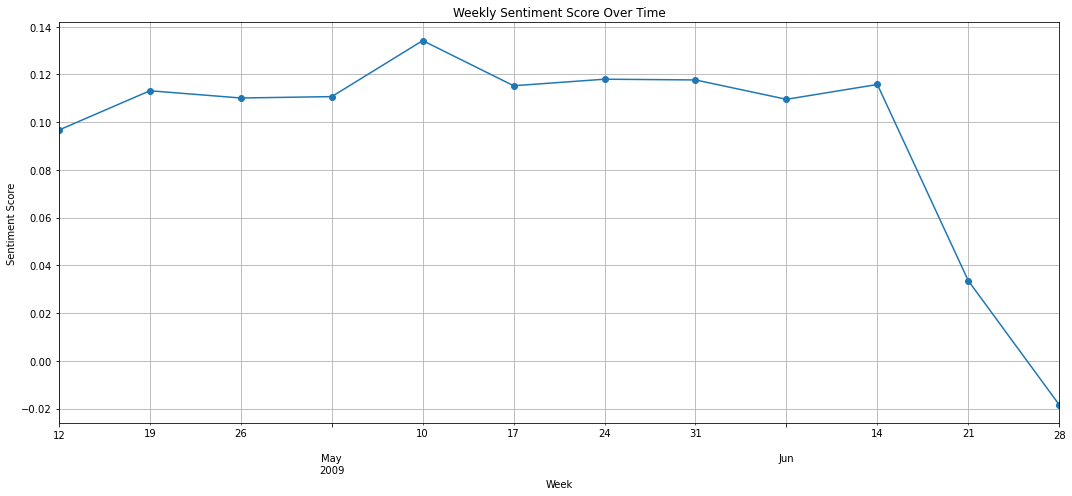

In [37]:
fig, ax = plt.subplots(figsize=(15, 7))
weekly_sentiment['sentiment_score'].plot(ax=ax, marker='o', linestyle='-')
ax.set_title('Weekly Sentiment Score Over Time')
ax.set_xlabel('Week')
ax.set_ylabel('Sentiment Score')
ax.grid(True, which='both')
plt.tight_layout()
plt.show()

In [36]:
from statsmodels.tsa.stattools import adfuller
# Perform Augmented Dickey-Fuller test
adf_test = adfuller(weekly_sentiment)

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_test[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary and may need differencing.")

ADF Statistic: 0.761156
p-value: 0.990983
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
The series is not stationary and may need differencing.


In [38]:
# Differencing the series
weekly_sentiment_diff = weekly_sentiment.diff().dropna()  # This drops the NA values that result from differencing

# Running ADF test again on the differenced data
adf_test_diff = adfuller(weekly_sentiment_diff)

print('ADF Statistic: %f' % adf_test_diff[0])
print('p-value: %f' % adf_test_diff[1])
print('Critical Values:')
for key, value in adf_test_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_test_diff[1] < 0.05:
    print("The differenced series is stationary.")
else:
    print("The differenced series is not stationary and may need further differencing or other transformations.")


ADF Statistic: -1.914235
p-value: 0.325395
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
The differenced series is not stationary and may need further differencing or other transformations.


In [39]:
# Second differencing
weekly_sentiment_diff2 = weekly_sentiment_diff.diff().dropna()

# Running ADF test again on the second differenced data
adf_test_diff2 = adfuller(weekly_sentiment_diff2)

print('ADF Statistic: %f' % adf_test_diff2[0])
print('p-value: %f' % adf_test_diff2[1])
print('Critical Values:')
for key, value in adf_test_diff2[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_test_diff2[1] < 0.05:
    print("The second differenced series is stationary.")
else:
    print("The second differenced series is not stationary and may need further transformations.")


ADF Statistic: -1.241421
p-value: 0.655528
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901
The second differenced series is not stationary and may need further transformations.


In [42]:
import numpy as np

# Apply log transformation
weekly_sentiment_log = np.log(weekly_sentiment.replace(0, np.nan)).dropna()

# Apply differencing to the log-transformed data
weekly_sentiment_log_diff = weekly_sentiment_log.diff().dropna()

# Running ADF test again on the log differenced data
adf_test_log_diff = adfuller(weekly_sentiment_log_diff)

print('ADF Statistic: %f' % adf_test_log_diff[0])
print('p-value: %f' % adf_test_log_diff[1])
print('Critical Values:')
for key, value in adf_test_log_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_test_log_diff[1] < 0.05:
    print("The log differenced series is stationary.")
else:
    print("The log differenced series is not stationary and may need further transformations.")


ADF Statistic: -1.315162
p-value: 0.622208
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
The log differenced series is not stationary and may need further transformations.


C:\Users\rmora\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [45]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

weekly_sentiment_score = weekly_sentiment["sentiment_score"]
# Apply Box-Cox transformation
sentiment_score_boxcox, lambda_value = boxcox(weekly_sentiment_score + 1) # Adding 1 to handle zero or negative values

# Apply differencing to the Box-Cox transformed data
sentiment_score_boxcox_diff = np.diff(sentiment_score_boxcox, n=1) # n=1 for first difference

# Running ADF test again on the Box-Cox differenced data
adf_test_boxcox_diff = adfuller(sentiment_score_boxcox_diff)

print('ADF Statistic: %f' % adf_test_boxcox_diff[0])
print('p-value: %f' % adf_test_boxcox_diff[1])
print('Critical Values:')
for key, value in adf_test_boxcox_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_test_boxcox_diff[1] < 0.05:
    print("The Box-Cox differenced series is stationary.")
else:
    print("The Box-Cox differenced series is not stationary and may need further transformations.")


ADF Statistic: -4.283110
p-value: 0.000475
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
The Box-Cox differenced series is stationary.


C:\Users\rmora\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


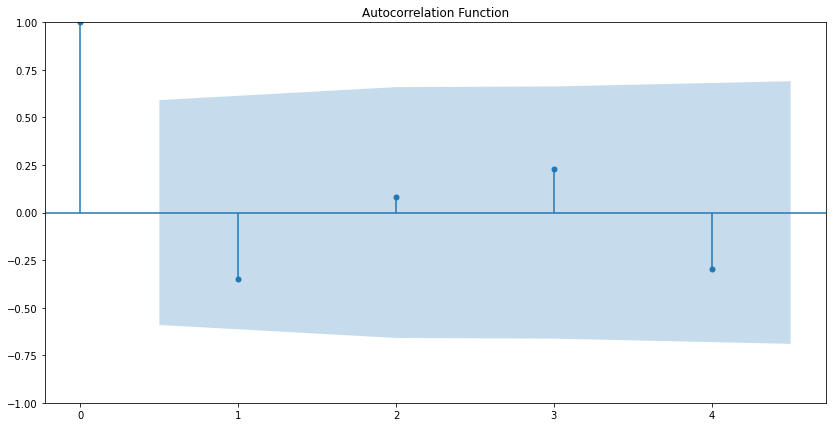

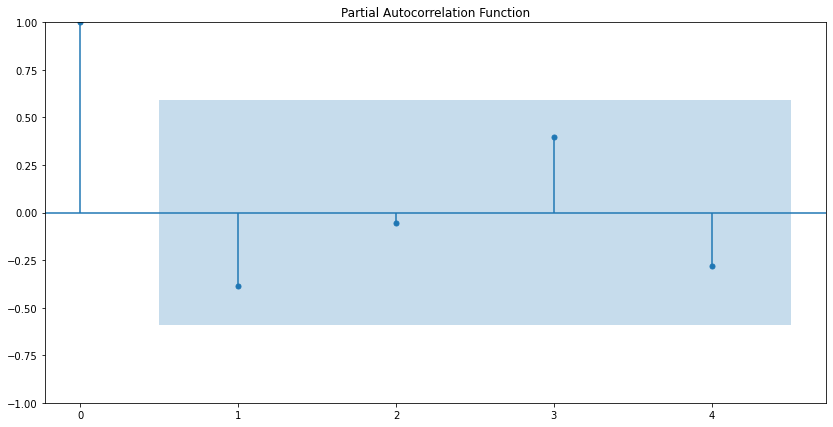

In [54]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot ACF
plt.figure(figsize=(14, 7))
plot_acf(sentiment_score_boxcox_diff, ax=plt.gca(), lags=4)  # You can adjust the number of lags as needed
plt.title('Autocorrelation Function')

# Plot PACF
plt.figure(figsize=(14, 7))
plot_pacf(sentiment_score_boxcox_diff, ax=plt.gca(), lags=4)  # You can adjust the number of lags as needed
plt.title('Partial Autocorrelation Function')

plt.show()

In [67]:
weekly_sentiment

,sentiment_score
Date,
2009-04-12,0.096715
2009-04-19,0.113171
2009-04-26,0.110139
2009-05-03,0.110717
2009-05-10,0.134177
2009-05-17,0.115270
2009-05-24,0.118007
2009-05-31,0.117700
2009-06-07,0.109591


In [55]:
# Assuming your data is in a pandas DataFrame and is already stationary and appropriate for modeling
n = len(sentiment_score_boxcox_diff)
train_size = int(n * 0.8)  # 80% for training

train_data = sentiment_score_boxcox_diff[:train_size]
test_data = sentiment_score_boxcox_diff[train_size:]

Train dates : 2009-04-12 00:00:00 --- 2009-06-07 00:00:00  (n=9)
Test dates  : 2009-06-14 00:00:00 --- 2009-06-28 00:00:00  (n=3)


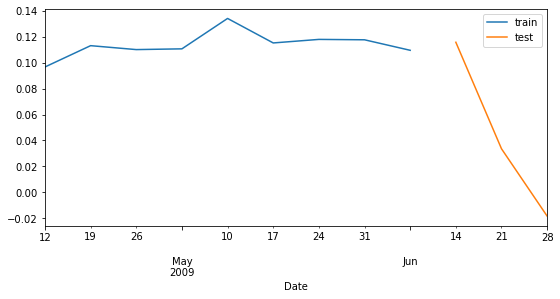

In [59]:
# Split data into train-test
# ==============================================================================
steps = 3
data_train = weekly_sentiment[:-steps]
data_test  = weekly_sentiment[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train['sentiment_score'].plot(ax=ax, label='train')
data_test['sentiment_score'].plot(ax=ax, label='test')
ax.legend();

In [63]:
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 3
                )

forecaster.fit(y=data_train['sentiment_score'])
forecaster

=======================ForecasterAutoreg=======================
Regressor: RandomForestRegressor(random_state=123)
Lags: [1 2 3]
Exogenous variable: False, None
Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}

In [64]:
# Predictions
# ==============================================================================
steps = 3
predictions = forecaster.predict(steps=steps)
predictions

array([0.1153189 , 0.12355048, 0.11513922])

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

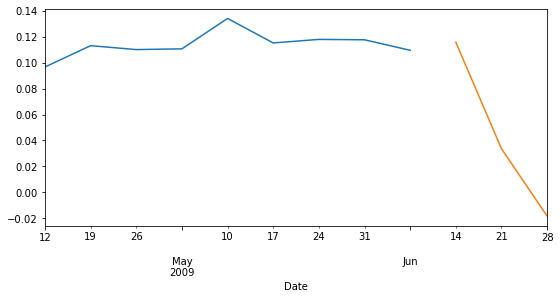

In [66]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['sentiment_score'].plot(ax=ax, label='train')
data_test['sentiment_score'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [56]:
import statsmodels.api as sm

# ARIMA model
# Assuming you've identified p, d, q. Let's say p=1, d=1, q=1 for example purposes.
model = sm.tsa.ARIMA(train_data, order=(1, 1, 1))
fit_model = model.fit()

# Summary of the model
print(fit_model.summary())

# Check diagnostics
fit_model.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecast
# The number of steps to forecast (let's say you want to forecast the next 2 steps)
n_steps = 2
forecast, stderr, conf_int = fit_model.forecast(steps=n_steps)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -2.794
Date:                Mon, 06 Nov 2023   AIC                             11.587
Time:                        13:10:19   BIC                             11.425
Sample:                             0   HQIC                             9.582
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4302      0.536     -0.802      0.422      -1.481       0.621
ma.L1         -0.8331      2.870     -0.290      0.772      -6.459       4.793
sigma2         0.0987      0.284      0.347      0.7

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1080x864 with 0 Axes>

In [21]:
# Aggregate the data by Date
agg_df = df2.resample('D').agg({
    'sentiment_score': 'mean',
    'text': 'size'
}).rename(columns={'text': 'tweet_count'})

agg_df.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [35]:
print(f'Number of rows with missing values: {agg_df.isnull().any(axis=1).mean()}')

NameError: name 'agg_df' is not defined

In [67]:
agg_df

,sentiment_score,tweet_count
Date,,
2009-04-06,0.092126,3327
2009-04-07,0.097603,17190
2009-04-08,NaN,0
2009-04-09,NaN,0
2009-04-10,NaN,0
...,...,...
2009-06-21,0.002074,16279
2009-06-22,-0.024936,11948
2009-06-23,-0.017939,16913


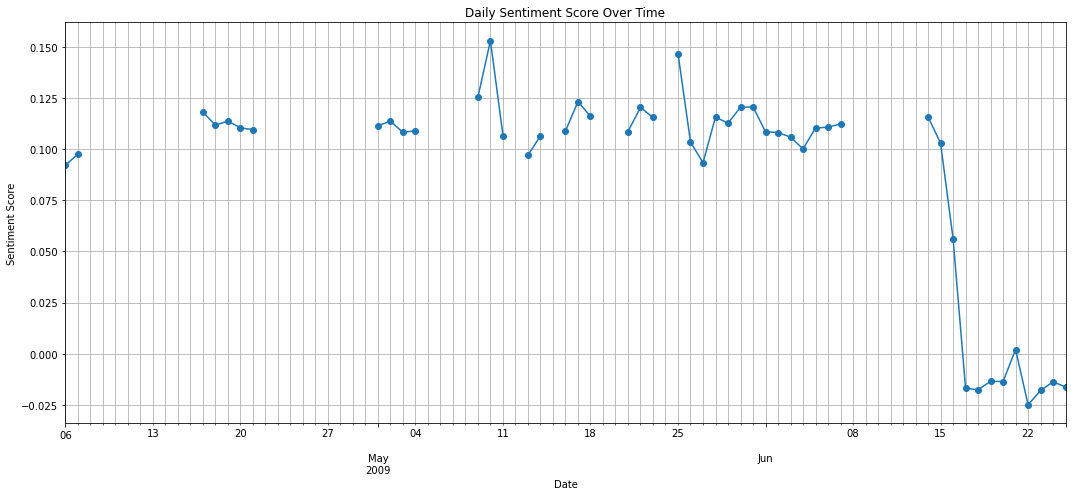

In [68]:
fig, ax = plt.subplots(figsize=(15, 7))
agg_df['sentiment_score'].plot(ax=ax, marker='o', linestyle='-')
ax.set_title('Daily Sentiment Score Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.grid(True, which='both')
plt.tight_layout()
plt.show()


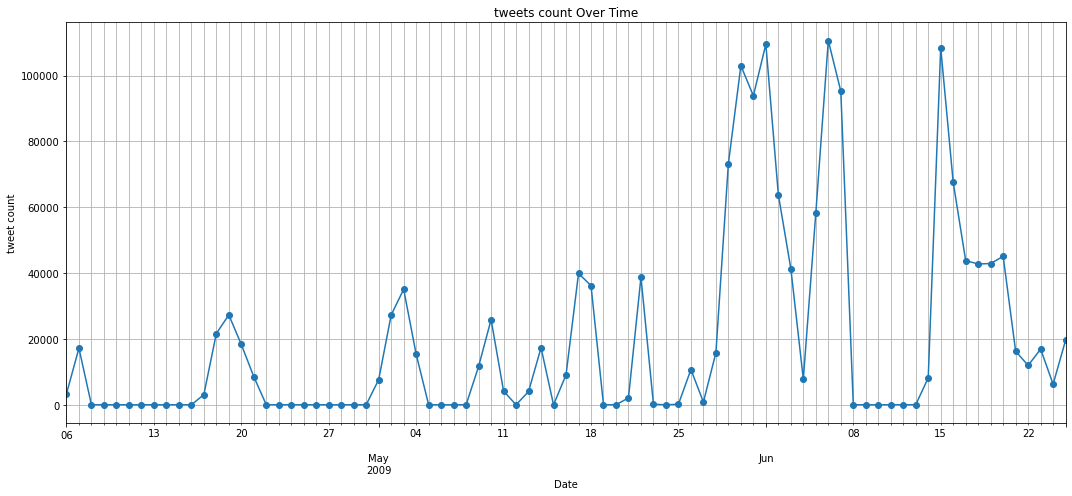

In [69]:
fig, ax = plt.subplots(figsize=(15, 7))
agg_df['tweet_count'].plot(ax=ax, marker='o', linestyle='-')
ax.set_title('tweets count Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('tweet count')
ax.grid(True, which='both')
plt.tight_layout()
plt.show()

In [70]:
agg_df2=agg_df

In [71]:
agg_df2['sentiment_score'] = agg_df2['sentiment_score'].interpolate(method='linear')

In [72]:
print(f'Number of rows with missing values: {agg_df2.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


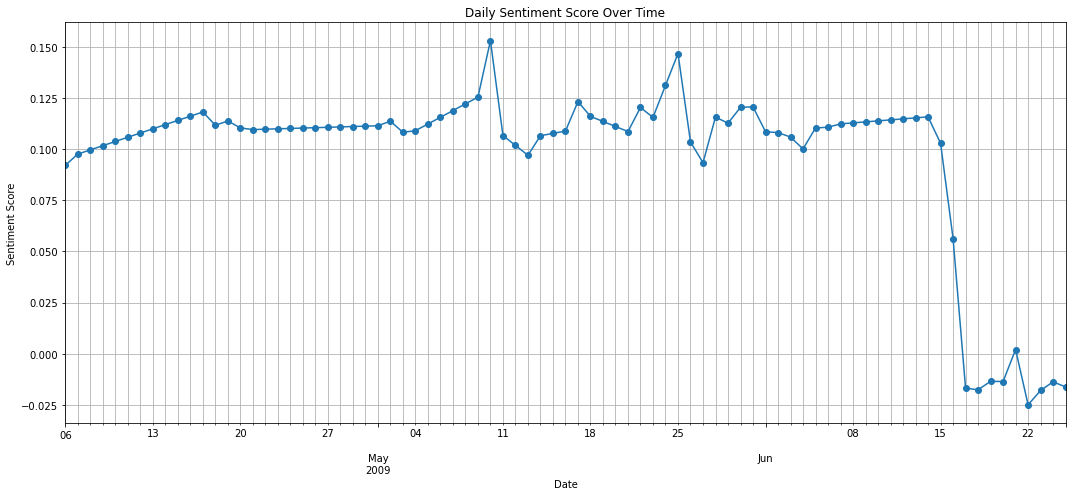

In [73]:
fig, ax = plt.subplots(figsize=(15, 7))
agg_df2['sentiment_score'].plot(ax=ax, marker='o', linestyle='-')
ax.set_title('Daily Sentiment Score Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.grid(True, which='both')
plt.tight_layout()
plt.show()

In [76]:
agg_df2['tweet_count'].replace(0, np.nan, inplace=True)
agg_df2['tweet_count'] = agg_df2['tweet_count'].interpolate(method='linear')

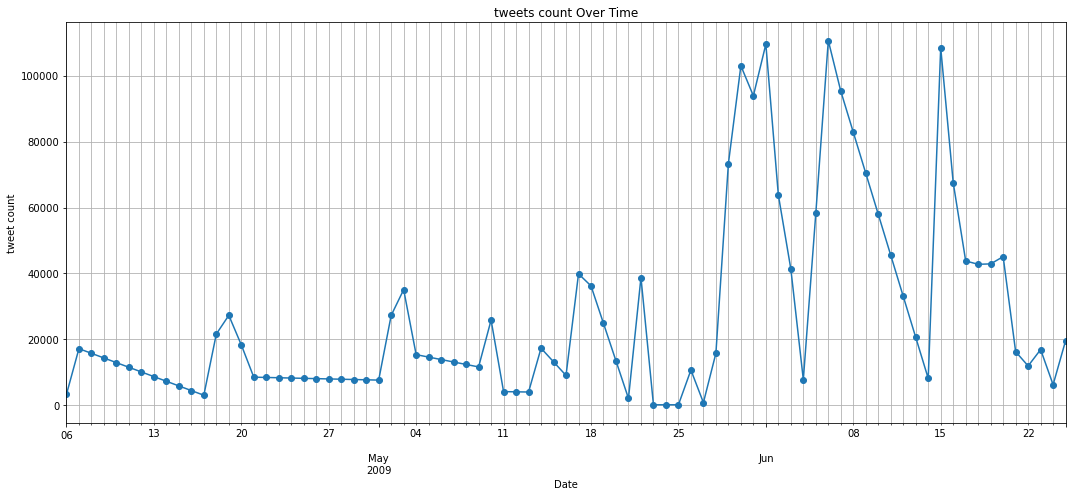

In [77]:
fig, ax = plt.subplots(figsize=(15, 7))
agg_df['tweet_count'].plot(ax=ax, marker='o', linestyle='-')
ax.set_title('tweets count Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('tweet count')
ax.grid(True, which='both')
plt.tight_layout()
plt.show()

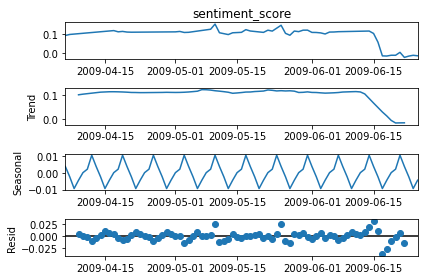

In [79]:
import statsmodels.api as sm
# Decompose the series
result = sm.tsa.seasonal_decompose(agg_df2['sentiment_score'], model='additive', period=7)  # Assuming a weekly seasonality for daily data

# Plot the decomposition
result.plot()
plt.show()

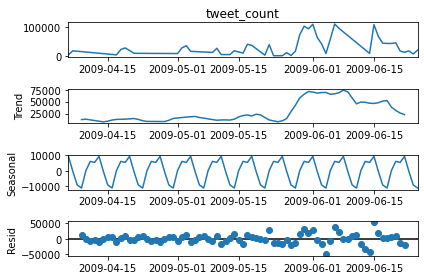

In [80]:
# Decompose the series
result = sm.tsa.seasonal_decompose(agg_df2['tweet_count'], model='additive', period=7)  # Assuming a weekly seasonality for daily data

# Plot the decomposition
result.plot()
plt.show()

In [88]:
# Normalize the sentiment_score and tweet_count columns
agg_df2['normalized_sentiment'] = (agg_df2['sentiment_score'] - agg_df2['sentiment_score'].min()) / (agg_df2['sentiment_score'].max() - agg_df2['sentiment_score'].min())
agg_df2['normalized_tweet_count'] = (agg_df2['tweet_count'] - agg_df2['tweet_count'].min()) / (agg_df2['tweet_count'].max() - agg_df2['tweet_count'].min())

In [90]:
# Compute the weighted sentiment using normalized values
agg_df2['weighted_sentiment'] = agg_df2['normalized_sentiment'] * agg_df2['normalized_tweet_count']

In [91]:
agg_df2.head()

,sentiment_score,tweet_count,weighted_sentiment,normalized_sentiment,normalized_tweet_count
Date,,,,,
2009-04-06,0.092126,3327.0,0.018815,0.657633,0.028610
2009-04-07,0.097603,17190.0,0.106100,0.688404,0.154124
2009-04-08,0.099662,15777.7,0.098932,0.699971,0.141337
2009-04-09,0.101721,14365.4,0.091468,0.711537,0.128550
2009-04-10,0.103780,12953.1,0.083709,0.723104,0.115764


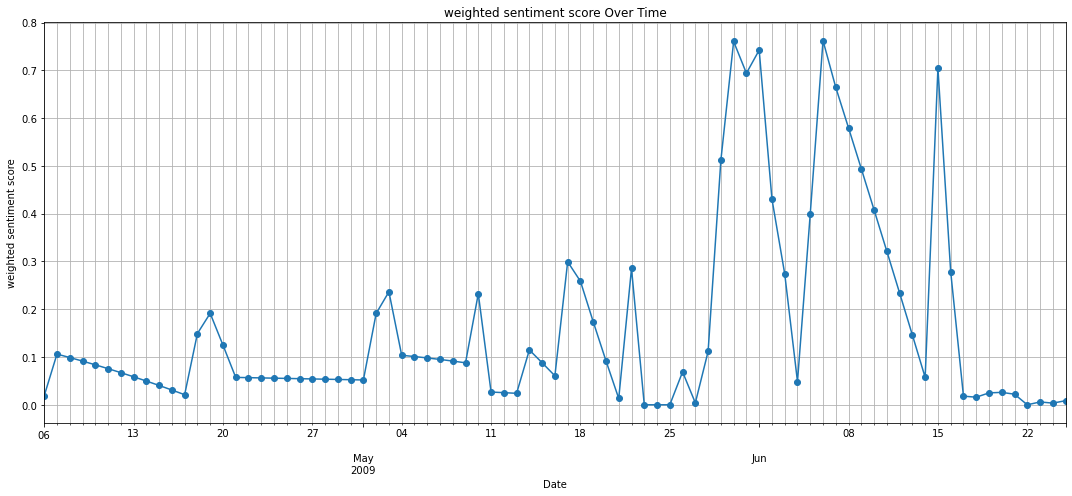

In [92]:
fig, ax = plt.subplots(figsize=(15, 7))
agg_df2['weighted_sentiment'].plot(ax=ax, marker='o', linestyle='-')
ax.set_title('weighted sentiment score Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('weighted sentiment score')
ax.grid(True, which='both')
plt.tight_layout()
plt.show()

In [93]:
agg_df2.describe()

,sentiment_score,tweet_count,weighted_sentiment,normalized_sentiment,normalized_tweet_count
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,0.097210,26820.080247,0.164556,0.686200,0.241314
std,0.041309,28839.745333,0.203577,0.232068,0.261111
min,-0.024936,167.000000,0.000000,0.000000,0.000000
25%,0.103780,8100.000000,0.040476,0.723104,0.071824
50%,0.110400,14365.400000,0.083709,0.760295,0.128550
75%,0.114074,38768.000000,0.232585,0.780937,0.349488
max,0.153068,110617.000000,0.762249,1.000000,1.000000


In [94]:
df.head()

,user,text,Hashtags,Mentions,pp_text,sentiment_score,sentiment_category
Date,,,,,,,
2009-04-06,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[],[switchfoot],thats bummer shoulda got david carr third day,0.000,neutral
2009-04-06,scotthamilton,is upset that he can't update his Facebook by ...,[],[],upset cant update facebook texting might cry r...,0.000,neutral
2009-04-06,mattycus,@Kenichan I dived many times for the ball. Man...,[],[Kenichan],dived many time ball managed save rest bound,0.500,positive
2009-04-06,ElleCTF,my whole body feels itchy and like its on fire,[],[],whole body feel itchy like fire,0.200,positive
2009-04-06,Karoli,"@nationwideclass no, it's not behaving at all....",[],[nationwideclass],behaving mad cant see,-0.625,negative


In [99]:
# Save the DataFrame to a CSV file
df.to_csv('cleaned_dataset.csv', index=True)

In [100]:
test_df= pd.read_csv("cleaned_dataset.csv")

In [101]:
test_df.head()

,Date,user,text,Hashtags,Mentions,pp_text,sentiment_score,sentiment_category
0,2009-04-06,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[],['switchfoot'],thats bummer shoulda got david carr third day,0.000,neutral
1,2009-04-06,scotthamilton,is upset that he can't update his Facebook by ...,[],[],upset cant update facebook texting might cry r...,0.000,neutral
2,2009-04-06,mattycus,@Kenichan I dived many times for the ball. Man...,[],['Kenichan'],dived many time ball managed save rest bound,0.500,positive
3,2009-04-06,ElleCTF,my whole body feels itchy and like its on fire,[],[],whole body feel itchy like fire,0.200,positive
4,2009-04-06,Karoli,"@nationwideclass no, it's not behaving at all....",[],['nationwideclass'],behaving mad cant see,-0.625,negative
